### Introduction ###
Sleeping patterns are critical to daily performance and personal well-being. Neglecting sleep can have drastic consequences, and there are various aspects of one’s lifestyle that can be affected by the quality and quantity of sleep one receives. For post-secondary students, prioritizing sleep by enhancing quality, duration, and consistency has been linked to improved academic performance (Okano et al., 2019, p. 16). Further, sleep loss and disorders have been linked to an increased risk of hypertension, diabetes, obesity, depression, heart attack, and stroke (Institute of Medicine et al., 2006, p. 1). For this reason, the motivation behind this report is to analyze how exogenous factors may predict sleep efficiency since sleep seems to have a significant impact on academic performance and health, which is of interest to post-secondary students. Thus, the selected Sleep Efficiency Dataset (Equilibriumm, 2023) will facilitate this analysis. In doing this analysis, variables that may be affected by the response variable are not to be selected as explanatory variables to avoid the issue of endogeneity. 

The selected dataset for this report includes a wide range of variables associated with different sleeping patterns as well as exogenous factors that may be of relevance. There are 452 observations recorded, each representing an individual and their associated age, gender, time at which they go to bed, time at which they wake up, sleep duration, sleep efficiency (characterized as the proportion of time spent asleep relative to the time the individual spent in bed), REM sleep percentage (the proportion of time spent asleep in the REM stage), deep sleep percentage, light sleep percentage, number of awakenings in the night, the amount of caffeine in mL consumed in the 24 hours before bed, the amount of alcohol in mL consumed in the 24 hours before bed, the individual’s smoking status, and the number of times the individual exercises per week. The data was collected in Morocco over the span of several months in 2021 through the recruitment of participants in the community. Self-reported surveys, actigraphy, and polysomnography were all used as data collection methods.

The aim of choosing the response variable was to select the variable that would provide a general but meaningful metric on sleep quality. Thus, sleep efficiency was chosen. It includes REM sleep, deep sleep, and light sleep, but also serves as a better metric than sleep duration, since there may be instances of an individual being in bed but being asleep.
Desjardins et al. (2019, p. 1) describe how most exogenous factors affect different ages similarly but focus primarily on how pain, nocturia, sleep medication, and awakenings from nightmares affect elderly sleep efficiency, and they find that these variables are associated with lower levels of sleep efficiency. The study by Drake et al. also reveals how caffeine consumption zero to six hours before bedtime increases sleep disturbances significantly (2013, p. 1195). However, it does not discuss how caffeine consumed 24 hours prior to bedtime might affect sleep efficiency, so there is uncertainty whether this effect would remain in our analysis since it includes caffeine consumption 24 hours prior to bedtime. Additionally, research has shown that increased alcohol consumption is associated with lower quality of sleep over long periods of time (Helaakoski et al., 2022, p. 1). Considering how often college students consume both caffeine and alcohol, these variables were found to be of interest (Mahoney et al., 2019) (Lorant et al., 2013, p. 1). Finally, increased physical activity is also associated with improved sleep quantity and quality (Dolezal et al., 2017, p. 12).

The existing research describes how nighttime awakenings, age, caffeine, alcohol, and exercise predict various metrics of sleep. However, there is little research exploring the relationships between all of these variables in a single model to predict sleep efficiency. Thus, the aim of this analysis is to understand how relevant exogenous variables in the dataset predict sleep efficiency. We find that from our dataset, age and caffeine consumption are not strong predictors of sleep efficiency, so we analyze how awakenings, alcohol consumption, and exercise frequency predict sleep efficiency. 

#### Tidying data for analysis ####
We start off our analysis by reading the dataset into R, and loading all necessary packages for the analysis.

In [89]:
install.packages("leaps")
library(leaps)
library(tidyverse)
library(dplyr)
library(cowplot)
library(ggplot2)
library(gridExtra)
library(repr)
library(GGally)
library(ISLR)
library(rsample)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [90]:
sleep1 <- read.table("Sleep_Efficiency.csv", sep = ",", header = TRUE)
head(sleep1)

ID Age Gender Bedtime             Wakeup.time         Sleep.duration
1 1  65  Female 2021-03-06 01:00:00 2021-03-06 07:00:00 6.0           
2 2  69  Male   2021-12-05 02:00:00 2021-12-05 09:00:00 7.0           
3 3  40  Female 2021-05-25 21:30:00 2021-05-25 05:30:00 8.0           
4 4  40  Female 2021-11-03 02:30:00 2021-11-03 08:30:00 6.0           
5 5  57  Male   2021-03-13 01:00:00 2021-03-13 09:00:00 8.0           
6 6  36  Female 2021-07-01 21:00:00 2021-07-01 04:30:00 7.5           
  Sleep.efficiency REM.sleep.percentage Deep.sleep.percentage
1 0.88             18                   70                   
2 0.66             19                   28                   
3 0.89             20                   70                   
4 0.51             23                   25                   
5 0.76             27                   55                   
6 0.90             23                   60                   
  Light.sleep.percentage Awakenings Caffeine.consumption Alcohol.consumption
1 12                     0           0                   0                  
2 53                     3           0                   3                  
3 10                     1           0                   0                  
4 52                     3          50                   5                  
5 18                     3           0                   3                  
6 17                     0          NA                   0                  
  Smoking.status Exercise.frequency
1 Yes            3                 
2 Yes            3                 
3 No             3                 
4 Yes            1                 
5 No             3                 
6 No             1

In [91]:
# cleaning data from NA values
map_df(sleep1, ~sum(is.na(.)))

# exclude NA values
sleep <- filter(sleep1,!is.na(Awakenings),!is.na(Caffeine.consumption),!is.na(Alcohol.consumption),!is.na(Exercise.frequency), !is.na(Age))

ID Age Gender Bedtime Wakeup.time Sleep.duration Sleep.efficiency
1 0  0   0      0       0           0              0               
  REM.sleep.percentage Deep.sleep.percentage Light.sleep.percentage Awakenings
1 0                    0                     0                      20        
  Caffeine.consumption Alcohol.consumption Smoking.status Exercise.frequency
1 25                   14                  0              6

### Data visualization to choose our explanatory variables ###

Using data visualization, we will first test sleep efficiency, our response variable, against the remaining exogenous variables in the dataset. The variables we will be plotted are age, awakenings, caffeine consumption, alcohol consumption, and exercise frequency. We will be using a series of scatterplots and boxplots to observe potential linear patters as well as spread of data to determine if the explanatory variables will make a good addition to our model.  

First we will plot sleep effiency against age:

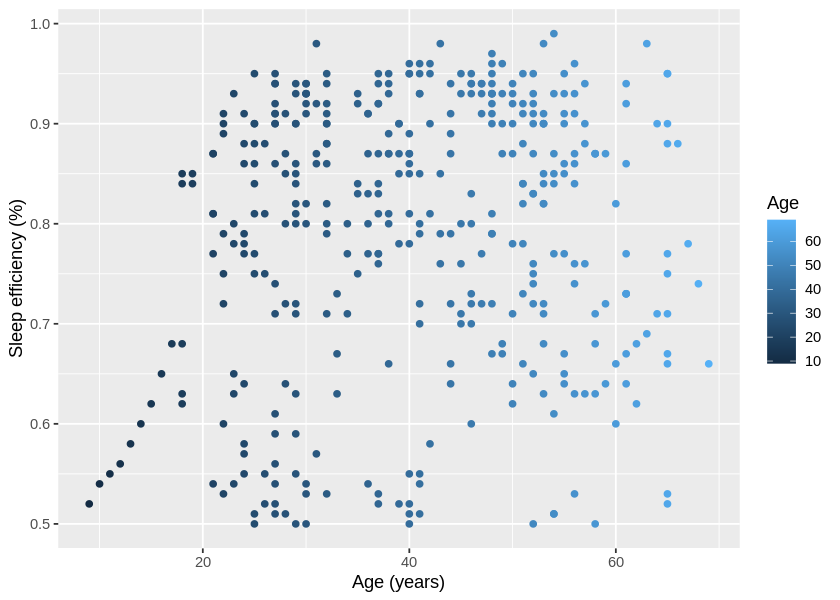

In [92]:
# Age vs. Sleep efficiency
options(repr.plot.height = 5, repr.plot.width = 7) 
age_plot <- sleep %>% 
    ggplot(aes(x = Age, y = Sleep.efficiency)) +
    geom_point(aes(colour = Age)) +
    xlab("Age (years)") + 
    ylab("Sleep efficiency (%)")
age_plot


From the scatterplot, notice the data is randomly spread out and therefore we do not observe any linear relationship between the two variables. As a result we will exclude age as an explanatory variable from our model. Our next variable in consideration is the number of awakenings per night:

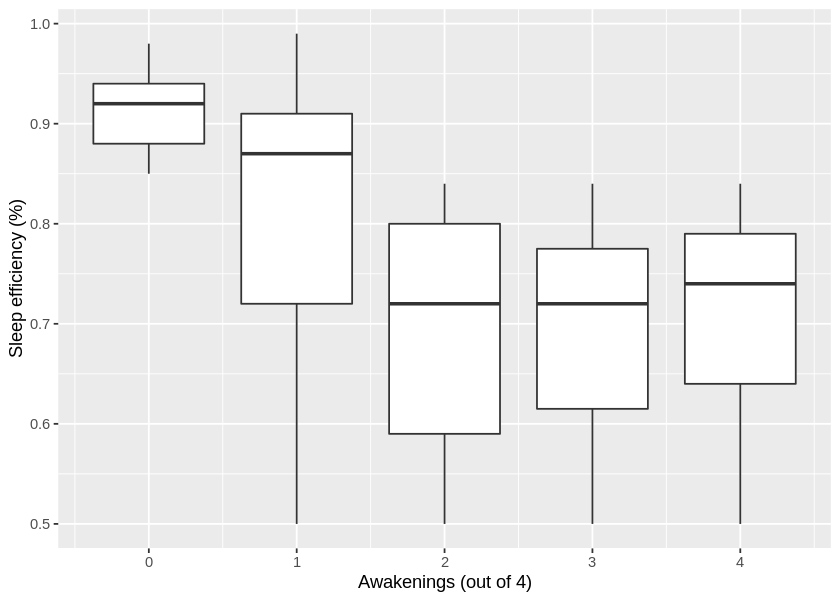

In [93]:
# Awakenings vs. Sleep efficiency
awakenings_plot <- sleep %>% 
    ggplot(aes(x = Awakenings, y = Sleep.efficiency)) +
    geom_boxplot(aes(group = Awakenings)) +
    xlab("Awakenings (out of 4)") + 
    ylab("Sleep efficiency (%)")
awakenings_plot

From the boxplot, we observe an overall decrease in the median of sleep efficiency as awakenings increases. Additionally, the spread of data points is similar between awakening levels 1-4. Therefore we will use awakenings as an explanatory variable in our model.

Next we will plot Sleep efficiency against Caffeine consumption:

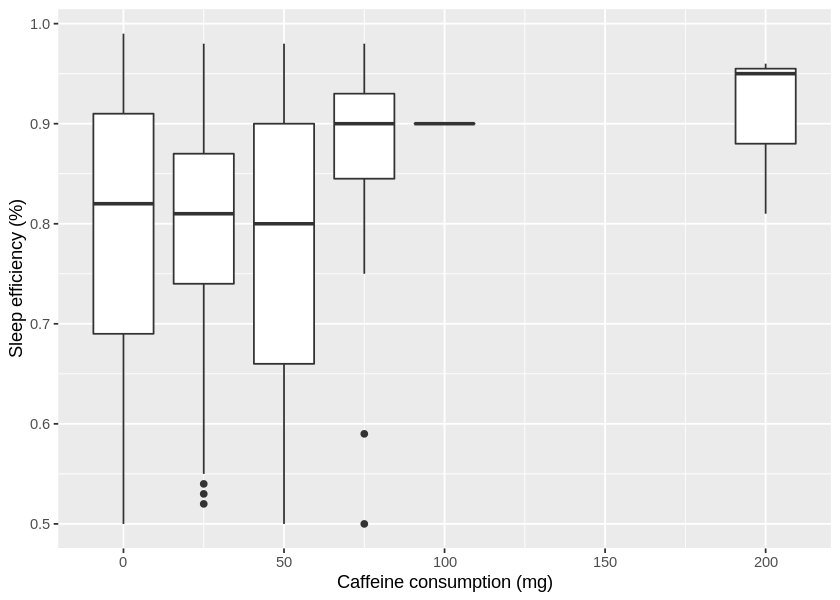

In [94]:
# Caffeine consumption vs. Sleep efficiency
caffeine_plot <- sleep %>% 
    ggplot(aes(x = Caffeine.consumption, y = Sleep.efficiency)) +
    geom_boxplot(aes(group = Caffeine.consumption)) + 
    xlab("Caffeine consumption (mg)") + 
    ylab("Sleep efficiency (%)")
caffeine_plot


As caffeine consumption increases, the mean for sleep efficiency is not linearly increasing nor decreasing. The sleep efficiency mean is close to 0.8, however its fluctuations are inconsistent and there are absent observations between 100 mg to 200 mg. The spread of the boxplots are also inconsistent, as 75 mg of caffeine has less spread than 50 mg. Because of the inconsistent data, we chose not to use caffeine consumption as an explanatory variable.

Our next plot will display Alcohol consumption vs. Sleep efficiency

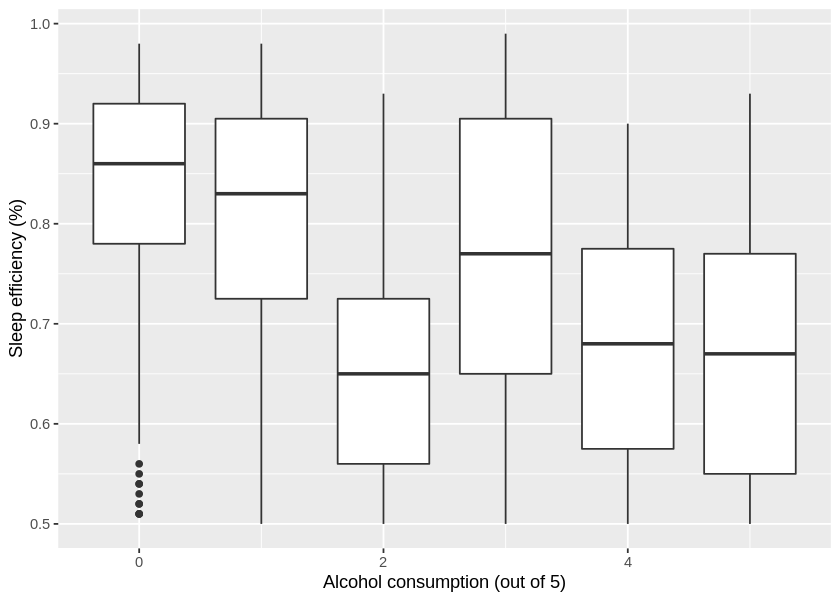

In [95]:
options(repr.plot.height = 5, repr.plot.width = 7) 

# Alcohol consumption vs. Sleep efficiency
alcohol_plot <- sleep %>% 
    ggplot(aes(x = Alcohol.consumption, y = Sleep.efficiency)) +
    geom_boxplot(aes(group = Alcohol.consumption)) +
    xlab("Alcohol consumption (out of 5)") + 
    ylab("Sleep efficiency (%)")
alcohol_plot

Once again, we observe an overall decrease in sleep efficiency as alcohol consumption increases, therefore we will use alcohol consumption as an explanatory variable in our model. For level 2 consumption there is a decrease in sleep efficiency, however we will assume this is due to experimental errors because the rest of the levels follows a negative trend.

The final variable we are considering is Exercise frequency against Sleep efficiency:

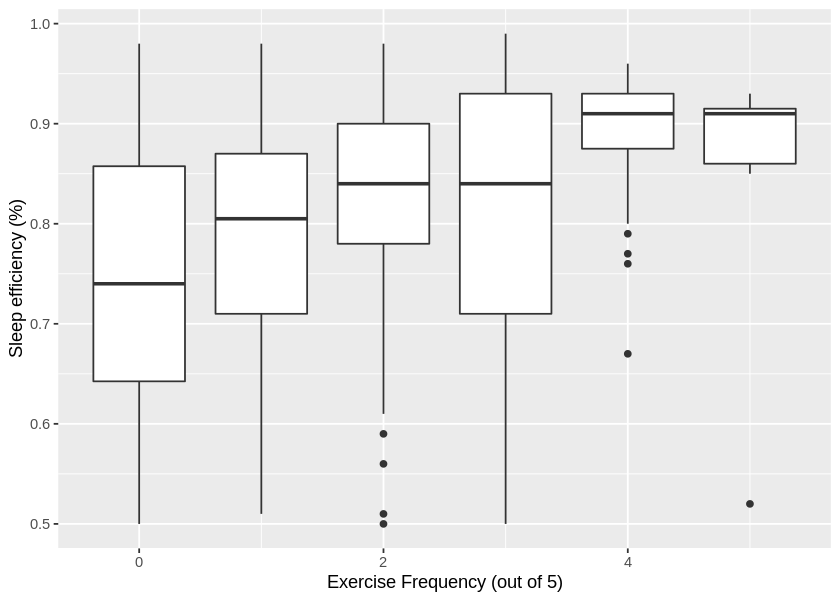

In [96]:
options(repr.plot.height = 5, repr.plot.width = 7) 
require(gridExtra)

# Exercise frequency vs. Sleep efficiency
exercise_plot <- sleep %>% 
    ggplot(aes(x = Exercise.frequency, y = Sleep.efficiency)) +
    geom_boxplot(aes(group = Exercise.frequency)) +
    xlab("Exercise Frequency (out of 5)") + 
    ylab("Sleep efficiency (%)")
exercise_plot

From the boxplot, we see a general positive increase in sleep efficiency when the median for the levels of exercise frequency increases. Therefore we will use exercise frequency as an explanatory variable in our model as there is a potential linear relationship. 

### Analysis ###
We will separate our data into an 80-20 split that allocates 80% of the data for training purposes and 20% for testing, which is beneficial for our relatively smaller dataset. We will use the training data to explore models and use the testing data to determine which model has the best fit. From the visualizations above, we will focus on testing the relationship between alcohol consumption, exercise frequency, and awakenings against sleep efficiency. Since we do not see an evident relationship between caffeine consumption and age against sleep efficiency, we chose to exclude these two variables.

In [97]:
sleep_split = initial_split(sleep, prop = 0.8, strata = Sleep.efficiency)
sleep_training = training(sleep_split)
sleep_testing = testing(sleep_split)

#### Testing dummy variables ####

A binary variable, known as a dummy variable, assumes values of either 0 or 1. These variables are introduced into a regression model to symbolize factors with a binary characteristic, meaning they are present or absent. Since dummy variables are used to encode levels of categorical variables, we will assign *Gender* as a dummy variable to differentiate between "Male" and "Female".

In [98]:
# creating dummy variables
gender_m <- ifelse(sleep_training$Gender == "Male", 1, 0)

# creating our model with dummy variables
dummy_model <- lm(Sleep.efficiency ~ Alcohol.consumption + Awakenings + Exercise.frequency + gender_m , data = sleep_training)
summary(dummy_model)



Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + gender_m, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.34111 -0.04835  0.01740  0.06889  0.23771 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.874214   0.013296  65.749  < 2e-16 ***
Alcohol.consumption -0.027857   0.003749  -7.431  1.1e-12 ***
Awakenings          -0.048314   0.004507 -10.720  < 2e-16 ***
Exercise.frequency   0.012451   0.004320   2.882  0.00423 ** 
gender_m             0.007858   0.012166   0.646  0.51882    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1023 on 304 degrees of freedom
Multiple R-squared:  0.4532,	Adjusted R-squared:  0.446 
F-statistic: 62.98 on 4 and 304 DF,  p-value: < 2.2e-16


From the model generated above, we can see that the most significant variables are those with the most asterisks. For the gender_m variable we created, there are no asterisks beside it which suggests the variable may not be signficiant. We will compare the above model to the model without dummy variables and determine their significance.


In [99]:
# creating our model without dummy variables
model1<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency, data = sleep_training)
summary(model1)



Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33776 -0.04708  0.01939  0.06901  0.24037 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.876024   0.012985  67.464  < 2e-16 ***
Alcohol.consumption -0.027742   0.003741  -7.416  1.2e-12 ***
Awakenings          -0.047973   0.004472 -10.728  < 2e-16 ***
Exercise.frequency   0.013235   0.004142   3.195  0.00154 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1022 on 305 degrees of freedom
Multiple R-squared:  0.4524,	Adjusted R-squared:  0.447 
F-statistic:    84 on 3 and 305 DF,  p-value: < 2.2e-16


From the results of the two models, we conclude that the dummy variable for gender is not a statistically significant variable. This is supported by the
adjusted R-Squared value, which slightly decreased after we added gender_m. Therefore we can drop Gender as a predictor for our model since it is not important for predicting sleep efficiency and we will use variables *Alcohol consumption, Awakenings*, and *Excercise frequency* in our prediction model.


#### Creating *model1*: the simplest model ####

After excluding dummy variables and dropping variables *Age* and *Caffeine consumption*, we start our analysis by building the simplest linear model, *model1*, which contains the following three variables: *Awakenings*, *Alcohol consumption* and *Exercise frequency*. The summary for *model1* can be seen above where we observe an adjusted R-squared value of 0.4153. Since the adjusted R-squared changes the R-squared statistic by penalizing the addition of unnecessary variables, this means it has a higher model's explanatory power. 


### Exploring interactions between variables ###


#### Creating model2: Two Interaction Terms ####
Since a model with a higher adjusted R-squared has a higher model's explanatory power, we also built an interactive model to see if it could increase the R-squared value that we are getting. From the analysis, we can see that interactions between Alcohol consumption*Exercise frequency and Alcohol consumption*Awakenings are significant at the 0.05 significance level. Thus, we created our *model2* with the terms Awakenings, Alcohol consumptions, Exercise frequency, Alcohol consumption*Exercise frequency and Alcohol consumption*Awakenings. From the model summary below, we have an adjusted R-squared of 0.4162, which is a slight increase, however we are still concerned about the complexity of *model2* compared to *model1*. 

In [100]:
# model with all interaction terms
model2_interaction <- lm(Sleep.efficiency ~Alcohol.consumption*Awakenings*Exercise.frequency, data = sleep_training)
summary(model2_interaction)

# model with only 2 interation terms
model2<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency + Alcohol.consumption*Awakenings + Alcohol.consumption*Exercise.frequency , data = sleep_training)
summary(model2)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption * Awakenings * 
    Exercise.frequency, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33340 -0.04459  0.01558  0.06660  0.23732 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                        0.892622   0.018388  48.544
Alcohol.consumption                               -0.050917   0.011675  -4.361
Awakenings                                        -0.052761   0.008601  -6.134
Exercise.frequency                                 0.006729   0.007283   0.924
Alcohol.consumption:Awakenings                     0.007521   0.004472   1.682
Alcohol.consumption:Exercise.frequency             0.009877   0.004680   2.111
Awakenings:Exercise.frequency                      0.001118   0.004147   0.270
Alcohol.consumption:Awakenings:Exercise.frequency -0.003031   0.002135  -1.420
                                                


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + Alcohol.consumption * Awakenings + Alcohol.consumption * 
    Exercise.frequency, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33369 -0.04461  0.01539  0.06675  0.22210 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.888778   0.015506  57.319  < 2e-16
Alcohol.consumption                    -0.040010   0.009256  -4.322  2.1e-05
Awakenings                             -0.050917   0.005512  -9.237  < 2e-16
Exercise.frequency                      0.008610   0.005210   1.653   0.0995
Alcohol.consumption:Awakenings          0.002698   0.002912   0.926   0.3550
Alcohol.consumption:Exercise.frequency  0.004056   0.002760   1.470   0.1427
                                          
(Intercept)                            ***
Alcohol.consumption                    ***
Awakenin

From the model summary, we see that the interaction terms *Alcohol.consumption:Awakenings* and *Alcohol.consumption:Exercise.frequency* are significant at the 0.05 significant level, so we will include these terms in our model2.

#### Residual Plots and QQ-Plots ####
To better understand our models, we create residual and QQ-plots for both *model1* and *model2* to see if our model requires further transformations.

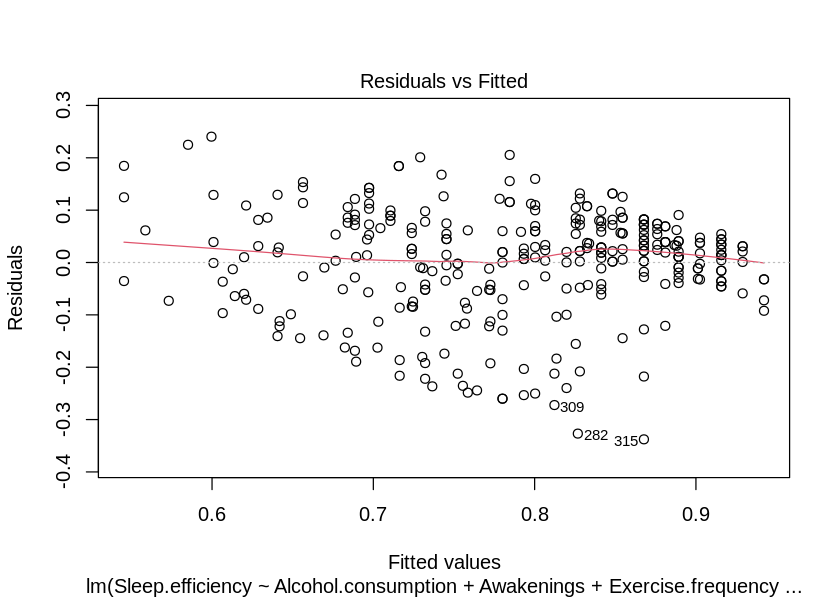

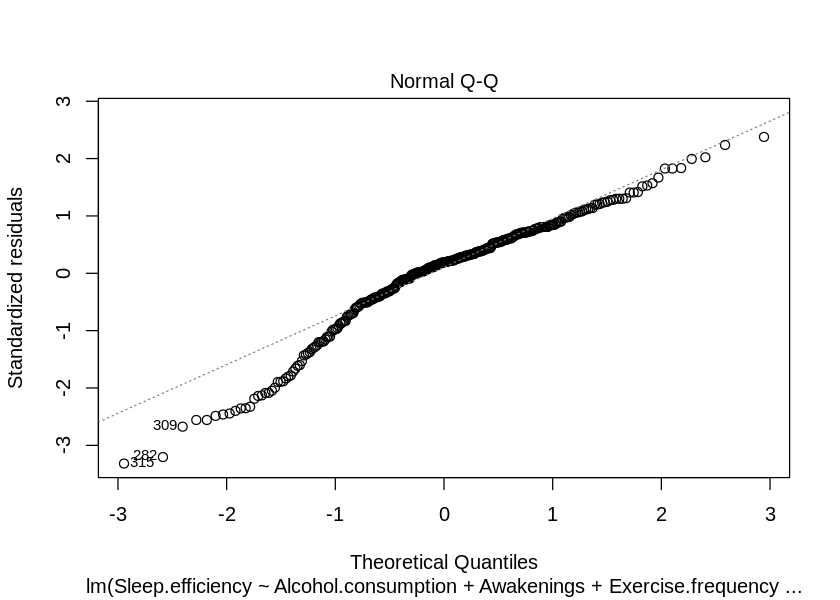

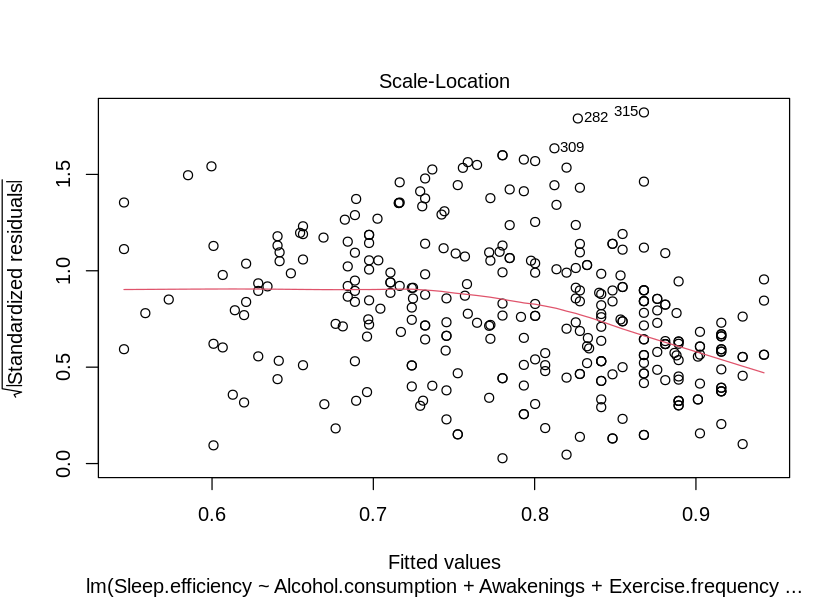

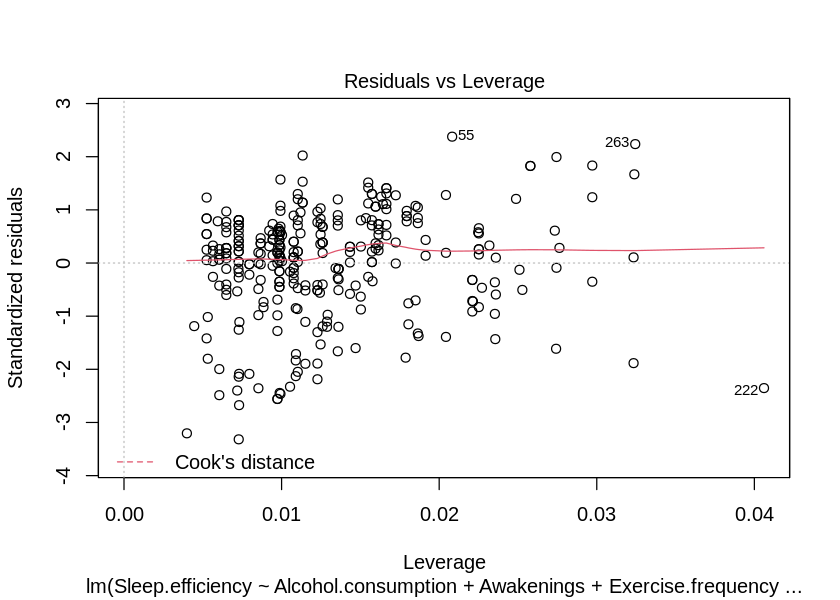

In [101]:
# plotting model 1
plot(model1)

From Figure 5: Awakenings vs Residuals for model 1, we can see a pattern suggesting a stronger model has a transformation of adding Awakening^2 to our regression model.

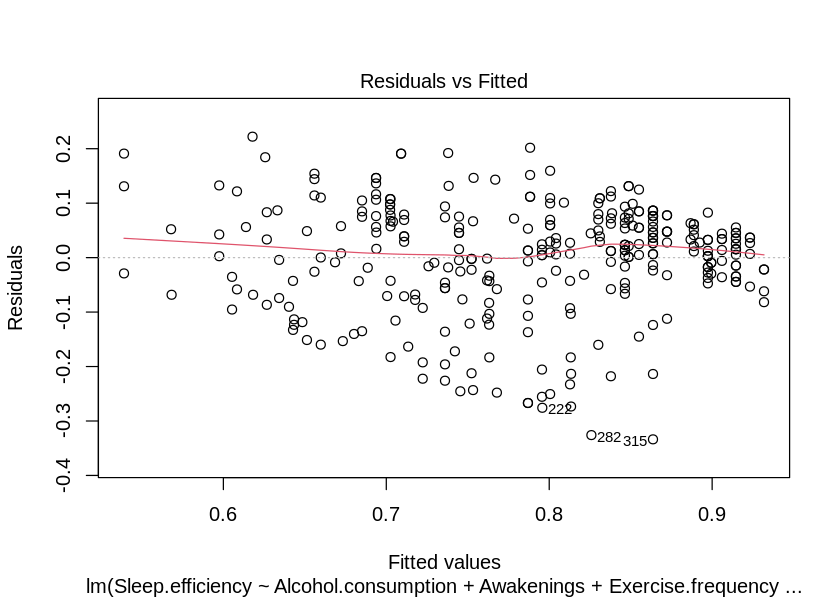

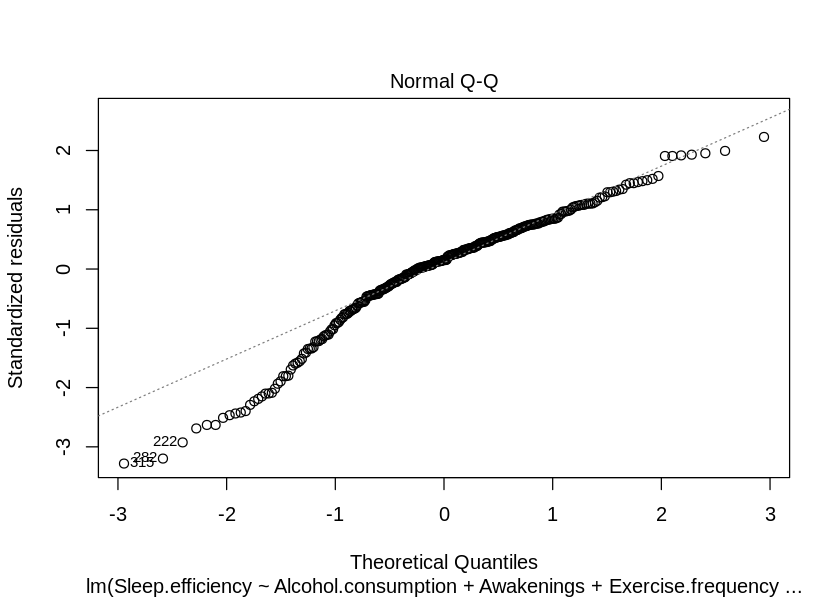

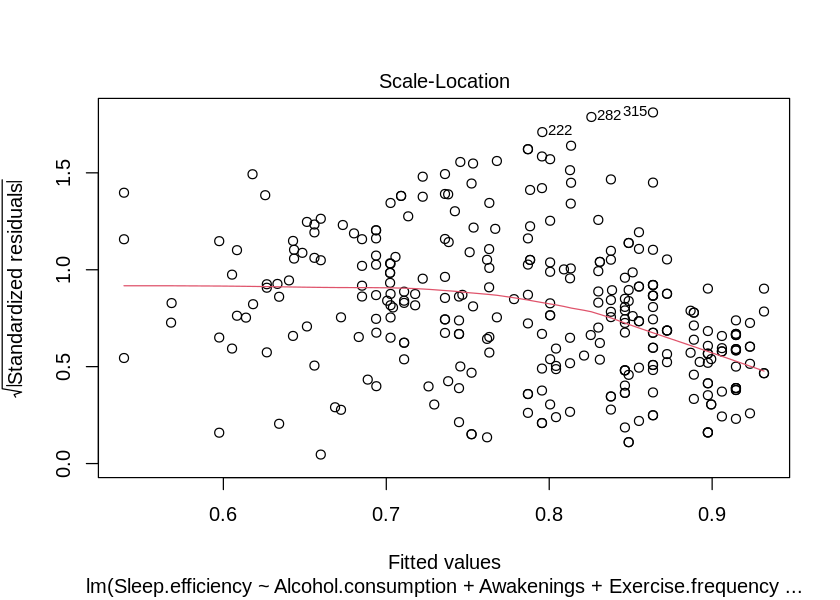

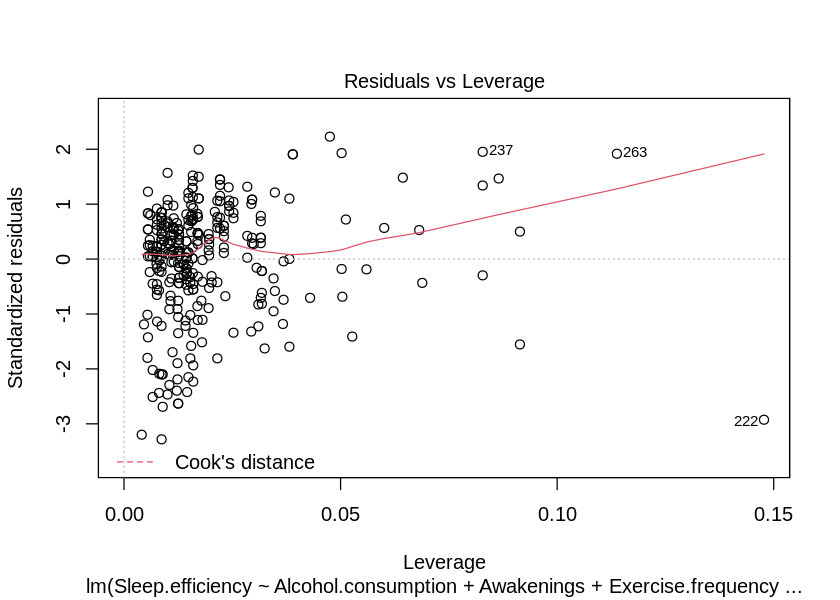

In [102]:
# plotting model2
plot(model2)

#### Plotting Residuals for model1 ####

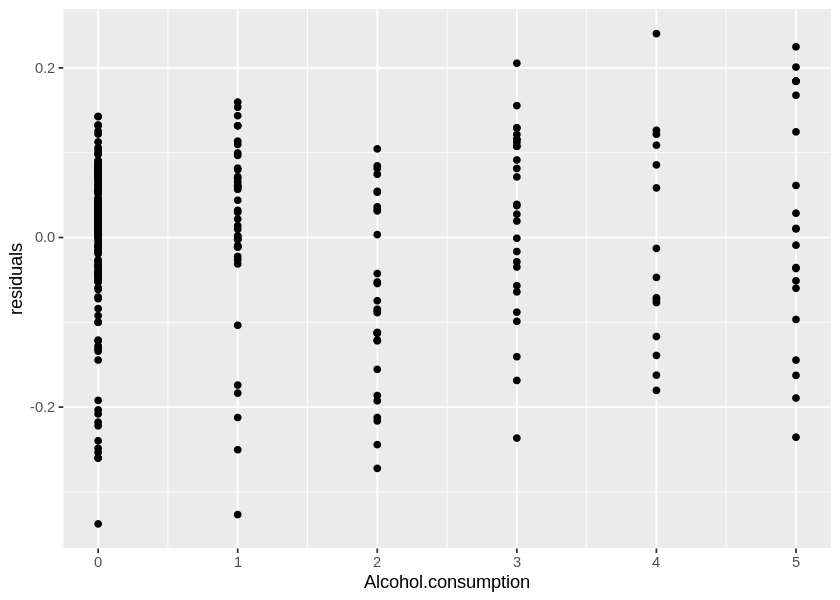

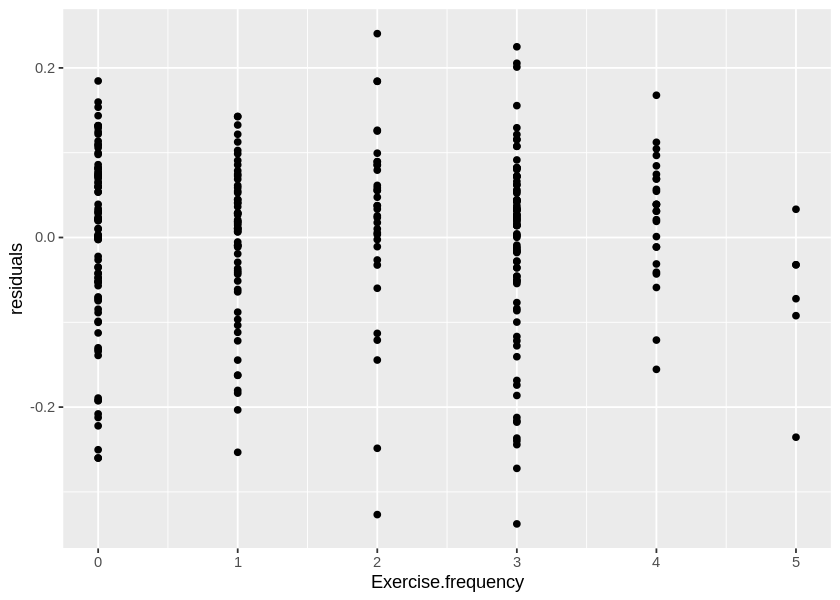

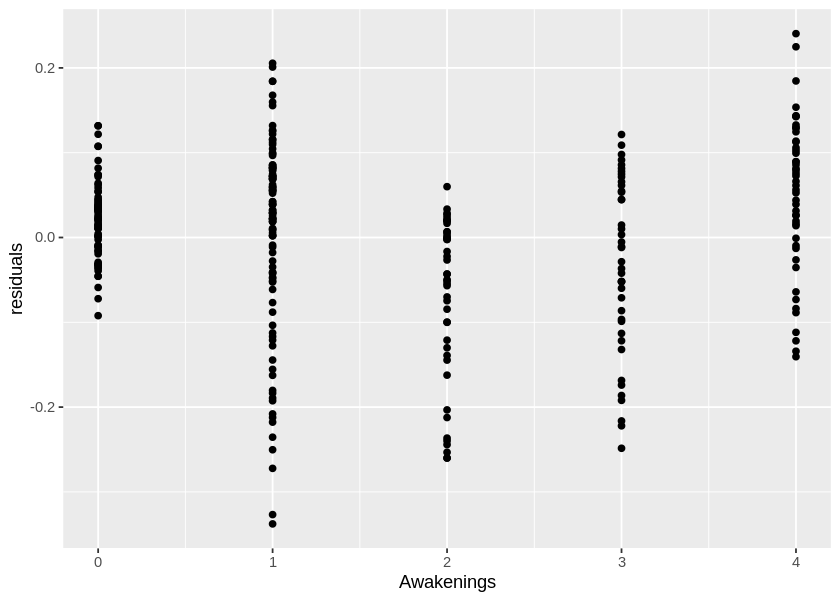

In [103]:
# Alcohol Consumption vs Residuals
residuals <- residuals(model1)
data<-data.frame(Alcohol.consumption = sleep_training$Alcohol.consumption, residuals = residuals)
ggplot(data,aes(Alcohol.consumption,residuals)) + geom_point()

# Exercise Frequency vs Residuals
data1<-data.frame(Exercise.frequency = sleep_training$Exercise.frequency, residuals = residuals)
ggplot(data1,aes(Exercise.frequency,residuals)) + geom_point()

# Awakenings vs Residuals
data2<-data.frame(Awakenings = sleep_training$Awakenings, residuals = residuals)
ggplot(data2,aes(Awakenings,residuals)) + geom_point()

#### Plotting Residuals for model2 ####

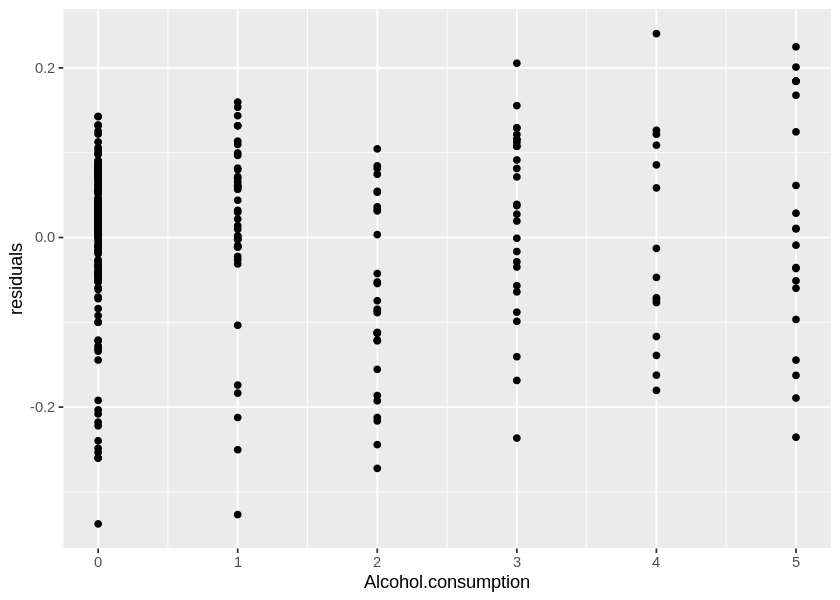

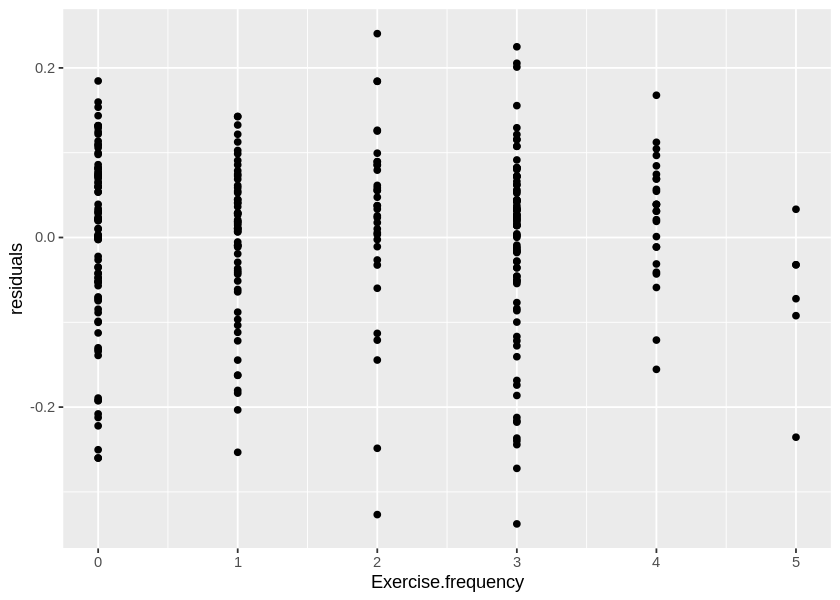

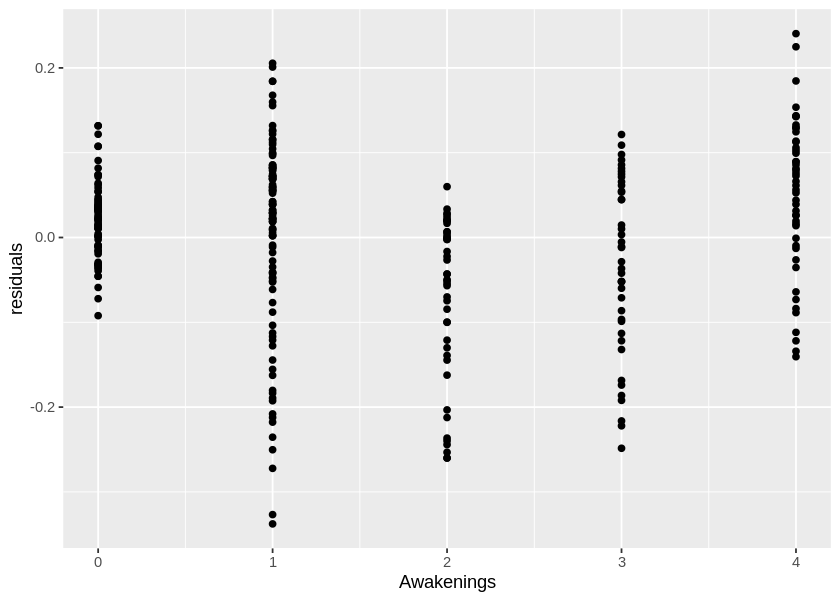

In [104]:
#Alcohol Consumption vs Residuals
residuals2 <- residuals(model2)
data.<-data.frame(Alcohol.consumption = sleep_training$Alcohol.consumption, residuals2 = residuals2)
ggplot(data.,aes(Alcohol.consumption,residuals)) + geom_point()

#Exercise Frequency vs Residuals
data.1<-data.frame(Exercise.frequency = sleep_training$Exercise.frequency, residuals2 = residuals2)
ggplot(data.1,aes(Exercise.frequency,residuals)) + geom_point()

#Awakenings vs Residuals
data.2<-data.frame(Awakenings = sleep_training$Awakenings, residuals2 = residuals2)
ggplot(data.2,aes(Awakenings,residuals)) + geom_point()

From above plots, we decided to square the explanatory variables to see if we can observe a better performance.

#### Creating model1_Trans and model2_Trans ####
To test our hypothesis, we will add *Awakening^2*, *Alcohol consumptions^2* and *Exercise frequency^2* to our past models, *model1* and *model2*, to see if *Awakening^2* or other terms are significant. From the summary, we can see only *Awakenings^2* is significant at the 0.001 significant level for both *model1* and *model2*

In [105]:
# Transformations testing for Model1
Alcohol_squared <- sleep_training$Alcohol.consumption^2

Awakenings_squared <- sleep_training$Awakenings^2

Exercise_squared <- sleep_training$Exercise.frequency^2

model1t<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency + Alcohol_squared + Awakenings_squared + Exercise_squared , data = sleep_training)
summary(model1t)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + Alcohol_squared + Awakenings_squared + 
    Exercise_squared, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32173 -0.05257  0.00568  0.06642  0.23196 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.915406   0.014973  61.138  < 2e-16 ***
Alcohol.consumption -0.043795   0.011635  -3.764 0.000201 ***
Awakenings          -0.124618   0.014652  -8.505 8.53e-16 ***
Exercise.frequency   0.022653   0.012378   1.830 0.068214 .  
Alcohol_squared      0.004188   0.002616   1.601 0.110474    
Awakenings_squared   0.019078   0.003493   5.462 9.82e-08 ***
Exercise_squared    -0.002899   0.003134  -0.925 0.355706    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0975 on 302 degrees of freedom
Multiple R-squared:  0.5063,	Adjusted R-squared:  0.4965 
F-statistic: 51.

Thus, we create a model called *model1_Trans* which is *model1* with the addition of *Awakening^2*, and *model2_Trans* which is *model2* with the addition of *Awakening^2*. Below are summaries for *model1_Trans* and *model2_Trans*.

In [106]:
# our transformation model for model1 (with no interation terms) will be:
model1_Trans<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency + Awakenings_squared, data = sleep_training)
summary(model1_Trans)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + Awakenings_squared, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31574 -0.05019  0.00981  0.06878  0.22323 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.914576   0.014352  63.725  < 2e-16 ***
Alcohol.consumption -0.026323   0.003591  -7.331 2.08e-12 ***
Awakenings          -0.123257   0.014651  -8.413 1.58e-15 ***
Exercise.frequency   0.011871   0.003973   2.988  0.00304 ** 
Awakenings_squared   0.018804   0.003500   5.373 1.54e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09781 on 304 degrees of freedom
Multiple R-squared:  0.4999,	Adjusted R-squared:  0.4933 
F-statistic: 75.97 on 4 and 304 DF,  p-value: < 2.2e-16


#### Trying transformations for model2 ####

In [107]:
# transformations testing for model2
Alcohol_squared <- sleep_training$Alcohol.consumption^2

Awakenings_squared <- sleep_training$Awakenings^2

Exercise_squared <- sleep_training$Exercise.frequency^2

model2t<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency +Alcohol_squared + Awakenings_squared + Exercise_squared+ Alcohol.consumption*Awakenings +
Alcohol.consumption*Exercise.frequency , data = sleep_training)
summary(model2t)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + Alcohol_squared + Awakenings_squared + 
    Exercise_squared + Alcohol.consumption * Awakenings + Alcohol.consumption * 
    Exercise.frequency, data = sleep_training)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.313007 -0.050337  0.009663  0.067789  0.221328 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.9270964  0.0168925  54.882  < 2e-16
Alcohol.consumption                    -0.0534294  0.0141837  -3.767 0.000199
Awakenings                             -0.1274439  0.0146662  -8.690  2.4e-16
Exercise.frequency                      0.0147932  0.0129691   1.141 0.254925
Alcohol_squared                         0.0049349  0.0026381   1.871 0.062369
Awakenings_squared                      0.0201143  0.0035771   5.623  4.3e-08
Exercise_squared                       -0.0023488  0.0031

In [108]:
# model2 with square of all terms has a lower R square compare to only add Awakeningsˆ2, so we try:
model2_Trans<- lm(Sleep.efficiency ~Alcohol.consumption + Awakenings + Exercise.frequency+

Awakenings_squared + Alcohol.consumption*Awakenings +
Alcohol.consumption*Exercise.frequency , data = sleep_training)

summary(model2_Trans)


Call:
lm(formula = Sleep.efficiency ~ Alcohol.consumption + Awakenings + 
    Exercise.frequency + Awakenings_squared + Alcohol.consumption * 
    Awakenings + Alcohol.consumption * Exercise.frequency, data = sleep_training)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30777 -0.04699  0.01011  0.07223  0.21162 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                             0.9249523  0.0162173  57.035  < 2e-16
Alcohol.consumption                    -0.0333838  0.0089249  -3.741  0.00022
Awakenings                             -0.1260505  0.0146889  -8.581 5.02e-16
Exercise.frequency                      0.0064074  0.0049935   1.283  0.20042
Awakenings_squared                      0.0196465  0.0035857   5.479 9.02e-08
Alcohol.consumption:Awakenings         -0.0004624  0.0028411  -0.163  0.87081
Alcohol.consumption:Exercise.frequency  0.0046836  0.0026393   1.775  0.07698
                               

From the four models below, we can see the adjusted R-squared for *model1_Trans* is 0.4511 and for *model2_Trans* it is 0.4507. There is a small difference between the two values, however we observe a slight increase between *model1* and *model2*. 

model1: 0.4562\
model1_Trans: 0.4511\
model2: 0.4563\
model2_Trans: 0.4507


#### Computing AIC for Further Comparison ####
In order to get more evidence for us to analyze which model is the best, we also evaluated our four models by the AIC (Akaike Information Criterion). A lower AIC value indicates a better trade-off between fit and complexity. From the AIC value calculated for each model shown below, we observe that *model1_Trans* has the lowest AIC value.


In [109]:
AIC(model1_Trans)
AIC(model1)
AIC(model2_Trans)
AIC(model2)

regsubsets(Sleep.efficiency ~Alcohol.consumption*Awakenings*Exercise.frequency +Alcohol_squared + Awakenings_squared + Exercise_squared , data = sleep_training)

[1] -552.8202

[1] -526.7872

[1] -552.5244

[1] -525.24

Subset selection object
Call: regsubsets.formula(Sleep.efficiency ~ Alcohol.consumption * Awakenings * 
    Exercise.frequency + Alcohol_squared + Awakenings_squared + 
    Exercise_squared, data = sleep_training)
10 Variables  (and intercept)
                                                  Forced in Forced out
Alcohol.consumption                                   FALSE      FALSE
Awakenings                                            FALSE      FALSE
Exercise.frequency                                    FALSE      FALSE
Alcohol_squared                                       FALSE      FALSE
Awakenings_squared                                    FALSE      FALSE
Exercise_squared                                      FALSE      FALSE
Alcohol.consumption:Awakenings                        FALSE      FALSE
Alcohol.consumption:Exercise.frequency                FALSE      FALSE
Awakenings:Exercise.frequency                         FALSE      FALSE
Alcohol.consumption:Awakenings:Exercise.freque

#### Compute RMSE for further comparison ####
Moreover, we use testing data (20% of the dataset) to compute the RMSE, which measures the average difference between the predicted and actual values to provide an estimation of how accurate the model is. We can use this to compare which of the four models fit the data better. From the RMSE of the four models shown below, we observed *model1_Trans* has the lowest RMSE value (the RMSE value will be different each time we run the codes, because the data allocation for testing data and training data are different each time).


In [110]:
# rmse for model1
rmse = function(u,v)sqrt(mean(u-v)^2)
rmse(sleep_testing$Sleep.efficiency, predict(model1,newdata=sleep_testing))

Alcohol_squared <- sleep_testing$Alcohol.consumption^2

Awakenings_squared <- sleep_testing$Awakenings^2

Exercise_squared <- sleep_testing$Exercise.frequency^2

rmse(sleep_testing$Sleep.efficiency, predict(model1_Trans,newdata=sleep_testing))
rmse(sleep_testing$Sleep.efficiency, predict(model2,newdata=sleep_testing))
rmse(sleep_testing$Sleep.efficiency, predict(model2_Trans,newdata=sleep_testing))

[1] 0.002798901

[1] 0.001216359

[1] 0.004020975

[1] 0.002797404

#### Pick the best model ####
From the analysis, we conclude that *model1_Trans* (which contains variables *Awakenings, Alcohol consumptions, Exercise frequency* and *Awakenings^2*) will be our final model. Firstly, it has a relatively high adjusted R-squared, and although *model2_Trans* is slightly higher, it is also much more complicated. Secondly, *model1_Trans* has the lowest AIC value, which indicates a better trade-off between fit and complexity. Lastly, *model1_Trans* also has the lowest RMSE value, meaning it has the lowest average difference between the predicted and actual values and is therefore more accurate.
